In [ ]:
import pandas as pd 
import os
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import random
path_data = "/content/drive/My Drive/ICIP/"
path_imgs = "/content/drive/My Drive/ICIP/train_imgs/"

In [ ]:
# Load data from csv
img_info = pd.read_csv(path_data+'img_info1.csv')
headers = pd.read_csv(path_data+'Header_new.csv')
users = pd.read_csv(path_data+'User_new.csv')
popularity = pd.read_csv(path_data+'popularity_TRAIN.csv')  #Actually contains the number of views over time

In [ ]:
#TEST DATA
test_path_data="/content/drive/My Drive/ICIP/TEST/"
test_path_imgs="/content/drive/My Drive/ICIP/TEST/test_imgs/"

In [ ]:
test_img_info=pd.read_csv(test_path_data+'img_info_TEST.csv')
test_users=pd.read_csv(test_path_data+'users_TEST.csv')
test_headers=pd.read_csv(test_path_data+'headers_TEST.csv')

In [ ]:
test_img_info

,Unnamed: 0,FlickrId,Camera,Size,Title,Description,NumSets,NumGroups,AvgGroupsMemb,AvgGroupPhotos,Tags,Latitude,Longitude,Country
0,0,49099585532,NaN,0,Xiapu Panorama,NaN,1,0,0.000000,0.000000,[],NaN,NaN,NaN
1,1,49099292416,NaN,0,2019-11-21_05-33-21,NaN,0,0,0.000000,0.000000,[],NaN,NaN,NaN
2,2,49099603657,NaN,12192768,Chickens like the crabapples,NaN,1,0,0.000000,0.000000,[],NaN,NaN,NaN
3,3,49099182586,NaN,9437184,🚚ADAM TRANSPORT CONTAİNER LİNE 📌 Volvo FHIV 54...,NaN,0,28,3812.142857,396478.214286,[],NaN,NaN,NaN
4,4,49099363971,NaN,2073600,シャリキン ホッピー❣️,I m at やきとん 炭火や! <a href= http://4sq.com/oJxFP...,0,0,0.000000,0.000000,[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,7995,49103501898,NaN,518400,"Venezia, nei giorni dell acqua granda ..",NaN,0,0,0.000000,0.000000,[],NaN,NaN,NaN
7689,7996,49104351206,NaN,15360000,"Juvenile Wren - Swell Wood, Somerset",NaN,2,0,0.000000,0.000000,[],NaN,NaN,NaN
7690,7997,49103602658,NaN,0,fish seller。Sai Kung Pier。HK,NaN,0,0,0.000000,0.000000,[],NaN,NaN,NaN
7691,7998,49104335402,NaN,0,HDR,NaN,0,0,0.000000,0.000000,[],NaN,NaN,NaN


In [ ]:
test_img_info.isnull().sum()

Unnamed: 0           0
FlickrId             0
Camera            7693
Size                 0
Title              954
Description       4815
NumSets              0
NumGroups            0
AvgGroupsMemb        0
AvgGroupPhotos       0
Tags                 0
Latitude          7091
Longitude         7091
Country           7091
dtype: int64

In [ ]:
test_headers.dtypes

Unnamed: 0     int64
FlickrId       int64
UserId        object
URL           object
DatePosted     int64
DateTaken      int64
DateCrawl      int64
dtype: object

In [ ]:
test_users

,Unnamed: 0,UserId,Username,Ispro,HasStats,Contacts,PhotoCount,MeanViews,GroupsCount,GroupsAvgMembers,GroupsAvgPictures
0,0,32011055@N05,HC.W.,1,1,212,2193,106.411765,74,14777.810811,4.993129e+05
1,1,147723055@N04,Professional Accountants,0,0,0,1700,5.078824,0,0.000000,0.000000e+00
2,2,59947702@N04,erwin.sutter,0,0,17,366,71.513661,14,67388.928571,7.590569e+05
3,3,85799273@N04,splatdoctor,0,0,43,3846,9.838534,2,175.000000,1.219500e+03
4,4,53351763@N06,kufarooq,0,0,5,1861,30.913487,7,97654.142857,1.008147e+06
...,...,...,...,...,...,...,...,...,...,...,...
23041,23041,67647802@N06,drzee47,1,1,7,540,38.529630,0,0.000000,0.000000e+00
23042,23042,156337128@N08,vireenmanas,0,0,0,75,4.226667,0,0.000000,0.000000e+00
23043,23043,168021415@N05,1991watch,0,0,0,214,5.812207,0,0.000000,0.000000e+00
23044,23044,133795025@N06,Jenni Amariles,0,0,11,184,35.934783,0,0.000000,0.000000e+00


In [ ]:
# img_info.describe

In [ ]:
#Links the user and photos. Just link the photoId. Other info not needed (now)
# headers['UserId'].value_counts()

In [ ]:
# headers[headers['UserId']=='49118647@N08'].sort_values(by=['FlickrId'])
#SINCE ONE USER CAN POST MANY PHOTOS

In [ ]:
#One user several photos
# users['UserId'].describe

In [ ]:
# popularity.describe

In [ ]:
#APPARENTLY THERE ARE MANY IMAGES THAT ARE IN USERS AND HEAD BUT NOT IN POPULARITY AND IMG_INFO. SO THESE PHOTOS ARE REMOVED

In [ ]:
#  os.listdir(path_imgs)
os.listdir(test_path_imgs)

In [ ]:
# #FOR TRAIN IMAGES
# train_images = os.listdir(path_imgs)
# # remove the .jpg extension
# train_images = [el.split('.')[0] for el in train_images]
# train_images_2 = img_info['FlickrId']
# # convert int to str
# train_images_2 = [str(el) for el in train_images_2]

In [ ]:
#FOR TEST IMAGES
test_images = os.listdir(test_path_imgs)
# remove the .jpg extension
test_images = [el.split('.')[0] for el in test_images]
test_images_2 = test_img_info['FlickrId']
# convert int to str
test_images_2 = [str(el) for el in test_images_2]

In [ ]:
#THERE WERE SOME DUPLICATE UPLOADS
# print(len(train_images))
print(len(test_images))
#ORIGINAL COUNT=7693

7703


In [ ]:
#REMOVING THE DUPLICATE IMAGES
train_images_1=[]
for i in range(len(train_images_2)):
  train_images_1.append(train_images_2[i])

In [ ]:
train_images_1

In [ ]:
# print(len(train_images_1))
# print(len(train_images_2))
# print(len(set(train_images_1) ^ set(train_images_2)))

In [ ]:
print(len(test_images))
print(len(test_images_2))
print(len(set(test_images) ^ set(test_images_2)))

7703
7693
10


In [ ]:
#CHECK ALL INFO
h_ids = headers['FlickrId'].values
gt_ids = popularity['FlickrId'].values

for photo_id in train_images_1:
     
    if int(photo_id) in h_ids and int(photo_id) in gt_ids:
        user_id = headers.loc[headers['FlickrId'] == int(photo_id)]['UserId']
        user_id = user_id.values[0]
        if user_id in users['UserId'].values:
            continue
        else:
            print(photo_id+'\tnot found!')
    else:
        print(photo_id+'\tnot found!')

In [ ]:
gt_ids.shape

(20337,)

In [ ]:
h_ids.shape

(28383,)

In [ ]:
#REMOVING THE FLICKRID'S FROM HEADS SHOULD SUFFICE

In [ ]:
#TRAIN
column_names=headers.columns
column_names

Index(['Unnamed: 0', 'FlickrId', 'UserId', 'URL', 'DatePosted', 'DateTaken',
       'DateCrawl'],
      dtype='object')

In [ ]:
header_new=pd.DataFrame(columns=column_names)
header_new

,Unnamed: 0,FlickrId,UserId,URL,DatePosted,DateTaken,DateCrawl


In [ ]:
for ids in img_info['FlickrId']:
  header_new=header_new.append(headers[headers['FlickrId']==ids])

In [ ]:
header_new

,Unnamed: 0,FlickrId,UserId,URL,DatePosted,DateTaken,DateCrawl
0,0,37452170716,143012821@N05,https://farm5.staticflickr.com/4483/3745217071...,1507148136,1507148136,1507149502
1,1,23647874758,153572873@N04,https://farm5.staticflickr.com/4476/2364787475...,1507148898,1507148898,1507149507
2,2,36831214503,63018044@N02,https://farm5.staticflickr.com/4465/3683121450...,1507149246,1507149246,1507149510
3,3,37469145482,37368250@N06,https://farm5.staticflickr.com/4499/3746914548...,1507148672,1507148672,1507149526
4,4,36790346604,159711713@N02,https://farm5.staticflickr.com/4446/3679034660...,1507149094,1507149094,1507149531
...,...,...,...,...,...,...,...
28376,28376,49108064673,33700924@N05,https://farm66.staticflickr.com/65535/49108064...,1574490299,1574490299,1574498296
28377,28377,49108582772,185704791@N08,https://farm66.staticflickr.com/65535/49108582...,1574486646,1574486646,1574498302
28379,28379,49107964558,22513491@N06,https://farm66.staticflickr.com/65535/49107964...,1574488275,1574488275,1574498315
28380,28380,49107962578,185411201@N05,https://farm66.staticflickr.com/65535/49107962...,1574488228,1574488228,1574498322


In [ ]:
header_new[header_new['FlickrId']==49104987298]

,Unnamed: 0,FlickrId,UserId,URL,DatePosted,DateTaken,DateCrawl
23578,23578,49104987298,184346028@N06,https://farm66.staticflickr.com/65535/49104987...,1574440668,1574440668,1574450855


In [ ]:
#DROPPING EXTRA ROWS
header_new.drop([23577],inplace=True)

In [ ]:
#Converting Timestamp to Date

In [ ]:
# import datetime

In [ ]:
# header_new['DateCrawlTimeStamp']=header_new.DateCrawl.astype(int)

In [ ]:
# header_new.dtypes

Unnamed: 0            object
FlickrId              object
UserId                object
URL                   object
DatePosted            object
DateTaken             object
DateCrawl             object
DateCrawlTimeStamp     int64
dtype: object

In [ ]:
# timestampUser=header_new['DateCrawlTimeStamp'].values

In [ ]:
# timestampUser.shape

(20338,)

In [ ]:
# timestampUser

array([1507149502, 1507149507, 1507149510, ..., 1574498315, 1574498322,
       1574498328])

In [ ]:
# timestampUser=timestampUser.reshape((timestampUser.shape[0],1))

In [ ]:
# dates=[]
# for i in range(timestampUser.shape[0]):
#   x=datetime.datetime.fromtimestamp(timestampUser[i]).isoformat()
#   y=x.split('-')
#   dates.append(y[0])

In [ ]:
# dates

In [ ]:
# header_new['Dates']=dates

In [ ]:
header_new.sort_values(by=['FlickrId'],inplace=True)

In [ ]:
#Dropping columns from header file
header_new.drop(['Unnamed: 0'],axis=1,inplace=True)
header_new.drop(['URL'],axis=1,inplace=True)
header_new.drop(['DatePosted'],axis=1,inplace=True)
header_new.drop(['DateTaken'],axis=1,inplace=True)
header_new.drop(['DateCrawl'],axis=1,inplace=True)
# header_new.drop(['DateCrawlTimeStamp'],axis=1,inplace=True)

In [ ]:
header_new[header_new['UserId']=='151771605@N03']['Dates'].value_counts()

2017    49
Name: Dates, dtype: int64

In [ ]:
header_new.drop(['Dates'],axis=1,inplace=True)

In [ ]:
header_new.head()

,FlickrId,UserId
940,23647573678,32659680@N00
249,23647582078,78682984@N00
83,23647582388,14305351@N00
167,23647583748,54533346@N03
819,23647586378,152637408@N06


In [ ]:
header_new.to_csv(path_data+'Header_new.csv',index=False)

In [ ]:
# header_new[header_new['UserId']=='139012440@N03']

In [ ]:
users

,Unnamed: 0,UserId,Username,Ispro,HasStats,Contacts,PhotoCount,MeanViews,GroupsCount,GroupsAvgMembers,GroupsAvgPictures
0,0,32011055@N05,HC.W.,1,1,212,2193,106.411765,74,14777.810811,4.993129e+05
1,1,147723055@N04,Professional Accountants,0,0,0,1700,5.078824,0,0.000000,0.000000e+00
2,2,59947702@N04,erwin.sutter,0,0,17,366,71.513661,14,67388.928571,7.590569e+05
3,3,85799273@N04,splatdoctor,0,0,43,3846,9.838534,2,175.000000,1.219500e+03
4,4,53351763@N06,kufarooq,0,0,5,1861,30.913487,7,97654.142857,1.008147e+06
...,...,...,...,...,...,...,...,...,...,...,...
23041,10700,67647802@N06,drzee47,1,1,7,540,38.529630,0,0.000000,0.000000e+00
23042,10701,156337128@N08,vireenmanas,0,0,0,75,4.226667,0,0.000000,0.000000e+00
23043,10702,168021415@N05,1991watch,0,0,0,214,5.812207,0,0.000000,0.000000e+00
23044,10703,133795025@N06,Jenni Amariles,0,0,11,184,35.934783,0,0.000000,0.000000e+00


In [ ]:
# users.sort_values(by=['UserId'],inplace=True)

In [ ]:
  users.UserId.value_counts()

146739006@N06    1
94050847@N06     1
150664521@N04    1
158306547@N08    1
184999486@N03    1
                ..
90852019@N08     1
64871401@N08     1
29609169@N02     1
164364908@N03    1
150649738@N08    1
Name: UserId, Length: 22325, dtype: int64

In [ ]:
# users.to_csv(path_data+'users.csv',index=False)

In [ ]:
# users_one=pd.read_csv(path_data+'users.csv')

In [ ]:
# users_one

In [ ]:
# users_one[users_one.UserId=='146739006@N06']

In [ ]:
#Keeping first users for 2017 and second for 2019 (will do later)

In [ ]:
#Checking if the second always has a higher value
users[users['UserId']=='146229960@N04']

,Unnamed: 0,UserId,Username,Ispro,HasStats,Contacts,PhotoCount,MeanViews,GroupsCount,GroupsAvgMembers,GroupsAvgPictures
19831,7490,146229960@N04,strangersmods,0,0,0,562,75.660142,23,45.173913,466.826087


In [ ]:
users.drop_duplicates(['UserId'],keep='last',inplace=True)

In [ ]:
#REMOVING UNNCECESSARY USERS
column_users=users.columns
users_new=pd.DataFrame(columns=column_users)
users_new.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: [Unnamed: 0, UserId, Username, Ispro, HasStats, Contacts, PhotoCount, MeanViews, GroupsCount, GroupsAvgMembers, GroupsAvgPictures]
Index: []>

In [ ]:
for uids in users['UserId']:
  if (header_new['UserId']==uids).any():
    users_new=users_new.append(users[users['UserId']==uids])

In [ ]:
users_new

,Unnamed: 0,UserId,Username,Ispro,HasStats,Contacts,PhotoCount,MeanViews,GroupsCount,GroupsAvgMembers,GroupsAvgPictures
1,1,147723055@N04,Professional Accountants,0,0,0,1700,5.078824,0,0.000000,0.000000e+00
6,6,61467889@N07,Adam Hardin,0,0,2,570,13.301754,0,0.000000,0.000000e+00
7,7,147542604@N05,bluejayphoenix7,0,0,33,1603,18.170930,12,790.416667,1.707708e+04
9,9,37171654@N03,Usagi93190,0,0,49,1835,10.023978,56,16525.285714,2.073896e+05
19,19,146766089@N08,tagzaty,0,0,4,6150,18.680163,0,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
23038,10697,24206456@N08,Laviano Images,1,1,32,1513,102.501652,27,4323.851852,6.823819e+04
23039,10698,169551755@N07,cjhall.nz,0,0,88,330,955.169697,67,28241.044776,1.110649e+06
23040,10699,63153524@N05,Ryan Ray Milan,0,0,132,502,275.368526,137,43431.459854,1.492800e+06
23041,10700,67647802@N06,drzee47,1,1,7,540,38.529630,0,0.000000,0.000000e+00


In [ ]:
#Dropping columns from users file
users_new.drop(['Unnamed: 0'],axis=1,inplace=True)
users_new.drop(['Username'],axis=1,inplace=True)

In [ ]:
users_new.head()

,UserId,Ispro,HasStats,Contacts,PhotoCount,MeanViews,GroupsCount,GroupsAvgMembers,GroupsAvgPictures
1,147723055@N04,0,0,0,1700,5.078824,0,0.000000,0.000000
6,61467889@N07,0,0,2,570,13.301754,0,0.000000,0.000000
7,147542604@N05,0,0,33,1603,18.170930,12,790.416667,17077.083333
9,37171654@N03,0,0,49,1835,10.023978,56,16525.285714,207389.589286
19,146766089@N08,0,0,4,6150,18.680163,0,0.000000,0.000000


In [ ]:
users_new.to_csv(path_data+'User_new.csv',index=False)

In [ ]:
# users_new[users_new['UserId']=='144547753@N04']

In [ ]:
# header_new[header_new['UserId']=='144547753@N04']

In [ ]:
# img_info[img_info['FlickrId']==37544007241]

In [ ]:
header_new.isnull().sum()

FlickrId    0
UserId      0
dtype: int64

In [ ]:
users_new.isnull().sum()

UserId               0
Ispro                0
HasStats             0
Contacts             0
PhotoCount           0
MeanViews            0
GroupsCount          0
GroupsAvgMembers     0
GroupsAvgPictures    0
dtype: int64

In [ ]:
#CAMERA,LAT,LONG AND COUNTRY HAVE TOO MANY MISSING VALUES AND ARE UNIMPORTANT SO DROP
img_info.drop(['Unnamed: 0'],axis=1,inplace=True)
img_info.drop(['Camera'],axis=1,inplace=True)
img_info.drop(['Latitude'],axis=1,inplace=True)
img_info.drop(['Longitude'],axis=1,inplace=True)
img_info.drop(['Country'],axis=1,inplace=True)

In [ ]:
# img_info['Tags'].value_counts()

In [ ]:
#CLEANING TAGS COLUMN
img_info['Tags']=img_info['Tags'].str.replace("[","") 
img_info['Tags']=img_info['Tags'].str.replace("]","") 
img_info['Tags']=img_info['Tags'].str.replace('"',"") 
img_info['Tags']=img_info['Tags'].str.replace(",","") 

In [ ]:
img_info

,FlickrId,Size,Title,Description,NumSets,NumGroups,AvgGroupsMemb,AvgGroupPhotos,Tags
0,37452170716,1166400,VATO GUAPO #carlosbasurtophotographer,via Instagram <a href= http://ift.tt/2y0lKEh ...,0,0,0.00,0.000000e+00,ifttt instagram
1,23647874758,12582912,2017-09-12_12-46-23,NaN,1,0,0.00,0.000000e+00,
2,36831214503,8992000,dubbele betekenis,"Door Astrid Wiessner-Hoog, s Heerenhoek roofv...",1,0,0.00,0.000000e+00,roofvogel
3,37469145482,264600,New shipment,NaN,1,0,0.00,0.000000e+00,
4,36790346604,22040424,Chiesa di San Jacopo,NaN,0,25,45885.16,2.258255e+06,
...,...,...,...,...,...,...,...,...,...
20332,49108064673,134400,"Germany-BRD -- 2017, MiNr",NaN,1,0,0.00,0.000000e+00,
20333,49108582772,1385280,Flowers of Light,NaN,0,3,15370.00,1.486276e+06,naturephotography nature whiteflowers travel c...
20334,49107964558,34739236,Sestri Levante,NaN,1,0,0.00,0.000000e+00,square color fujifilmgfxr trees water harbor i...
20335,49107962578,1200000,VEGAN MOM - Funny coffee mug,<a href= https://funnygifts.shop/products/vega...,0,0,0.00,0.000000e+00,vegan mom funny coffee mug animalrights veganc...


In [ ]:
img_info.to_csv(path_data+"img_info1.csv",index=False) 

In [ ]:
img_info.dtypes

FlickrId            int64
Size                int64
Title              object
Description        object
NumSets             int64
NumGroups           int64
AvgGroupsMemb     float64
AvgGroupPhotos    float64
Tags               object
dtype: object

In [ ]:
#TEST

In [ ]:
test_img_info

,Unnamed: 0,FlickrId,Camera,Size,Title,Description,NumSets,NumGroups,AvgGroupsMemb,AvgGroupPhotos,Tags,Latitude,Longitude,Country
0,0,49099585532,NaN,0,Xiapu Panorama,NaN,1,0,0.000000,0.000000,[],NaN,NaN,NaN
1,1,49099292416,NaN,0,2019-11-21_05-33-21,NaN,0,0,0.000000,0.000000,[],NaN,NaN,NaN
2,2,49099603657,NaN,12192768,Chickens like the crabapples,NaN,1,0,0.000000,0.000000,[],NaN,NaN,NaN
3,3,49099182586,NaN,9437184,🚚ADAM TRANSPORT CONTAİNER LİNE 📌 Volvo FHIV 54...,NaN,0,28,3812.142857,396478.214286,[],NaN,NaN,NaN
4,4,49099363971,NaN,2073600,シャリキン ホッピー❣️,I m at やきとん 炭火や! <a href= http://4sq.com/oJxFP...,0,0,0.000000,0.000000,[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,7995,49103501898,NaN,518400,"Venezia, nei giorni dell acqua granda ..",NaN,0,0,0.000000,0.000000,[],NaN,NaN,NaN
7689,7996,49104351206,NaN,15360000,"Juvenile Wren - Swell Wood, Somerset",NaN,2,0,0.000000,0.000000,[],NaN,NaN,NaN
7690,7997,49103602658,NaN,0,fish seller。Sai Kung Pier。HK,NaN,0,0,0.000000,0.000000,[],NaN,NaN,NaN
7691,7998,49104335402,NaN,0,HDR,NaN,0,0,0.000000,0.000000,[],NaN,NaN,NaN


In [ ]:
test_column_names=test_headers.columns
test_column_names

Index(['Unnamed: 0', 'FlickrId', 'UserId', 'URL', 'DatePosted', 'DateTaken',
       'DateCrawl'],
      dtype='object')

In [ ]:
test_header_new=pd.DataFrame(columns=test_column_names)
test_header_new

,Unnamed: 0,FlickrId,UserId,URL,DatePosted,DateTaken,DateCrawl


In [ ]:
for ids in test_img_info['FlickrId']:
  test_header_new=test_header_new.append(test_headers[test_headers['FlickrId']==ids])

In [ ]:
test_header_new

,Unnamed: 0,FlickrId,UserId,URL,DatePosted,DateTaken,DateCrawl
0,0,49099585532,27656681@N00,https://farm66.staticflickr.com/65535/49099585...,1574334374,1574334374,1574336271
1,1,49099292416,52942268@N02,https://farm66.staticflickr.com/65535/49099292...,1574332413,1574332413,1574336294
2,2,49099603657,125170987@N08,https://farm66.staticflickr.com/65535/49099603...,1574334777,1574334777,1574336301
3,3,49099182586,168070538@N08,https://farm66.staticflickr.com/65535/49099182...,1574329988,1574329988,1574336320
4,4,49099363971,28110754@N04,https://farm66.staticflickr.com/65535/49099363...,1574333778,1574333778,1574336328
...,...,...,...,...,...,...,...
7997,7997,49103501898,34651613@N07,https://farm66.staticflickr.com/65535/49103501...,1574418947,1574418947,1574434469
7998,7998,49104351206,16589008@N06,https://farm66.staticflickr.com/65535/49104351...,1574425693,1574425693,1574434482
7999,7999,49103602658,41211392@N00,https://farm66.staticflickr.com/65535/49103602...,1574421102,1574421102,1574434488
8000,8000,49104335402,146050388@N03,https://farm66.staticflickr.com/65535/49104335...,1574421812,1574421812,1574434496


In [ ]:
test_header_new.FlickrId.value_counts()

49104126236    2
49100358943    2
49102962687    1
49103852991    1
49099822501    1
              ..
49099123571    1
49100877977    1
49102236533    1
49103399802    1
49102389248    1
Name: FlickrId, Length: 7693, dtype: int64

In [ ]:
test_header_new[test_header_new.FlickrId==49100358943]  

,Unnamed: 0,FlickrId,UserId,URL,DatePosted,DateTaken,DateCrawl
2537,2537,49100358943,160939919@N03,https://farm66.staticflickr.com/65535/49100358...,1574358113,1574358113,1574368352
2538,2538,49100358943,160939919@N03,https://farm66.staticflickr.com/65535/49100358...,1574358113,1574358113,1574368368


In [ ]:
#DROPPING EXTRA ROWS
test_header_new.drop([2537],inplace=True)
test_header_new.drop([7636],inplace=True)

In [ ]:
#SORTING

test_header_new.sort_values(by=['FlickrId'],inplace=True)

In [ ]:
#Dropping columns from header file
test_header_new.drop(['Unnamed: 0'],axis=1,inplace=True)
test_header_new.drop(['URL'],axis=1,inplace=True)
test_header_new.drop(['DatePosted'],axis=1,inplace=True)
test_header_new.drop(['DateTaken'],axis=1,inplace=True)
test_header_new.drop(['DateCrawl'],axis=1,inplace=True)

In [ ]:
test_header_new.head()

,FlickrId,UserId
478,49098581833,42136457@N05
541,49098582593,123567034@N07
22,49098582698,37317281@N08
671,49098582733,124450184@N05
585,49098584118,141145317@N07


In [ ]:
test_users.UserId.value_counts()

11376383@N00     1
76228400@N07     1
119593654@N07    1
170971137@N06    1
143259339@N02    1
                ..
90683842@N00     1
88961437@N00     1
126256516@N02    1
19017633@N00     1
157953637@N06    1
Name: UserId, Length: 22325, dtype: int64

In [ ]:
#DROPPING DUPLICATE ROWS
test_users.drop_duplicates(['UserId'],keep='last',inplace=True)

In [ ]:
#DROPPING UNNCESSARY USERS
test_column_users=test_users.columns
test_users_new=pd.DataFrame(columns=test_column_users)
test_users_new.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: [Unnamed: 0, UserId, Username, Ispro, HasStats, Contacts, PhotoCount, MeanViews, GroupsCount, GroupsAvgMembers, GroupsAvgPictures]
Index: []>

In [ ]:
#REMOVING THEM
for uids in test_users['UserId']:
  if (test_header_new['UserId']==uids).any():
    test_users_new=test_users_new.append(test_users[test_users['UserId']==uids])

In [ ]:
test_users_new

,Unnamed: 0,UserId,Username,Ispro,HasStats,Contacts,PhotoCount,MeanViews,GroupsCount,GroupsAvgMembers,GroupsAvgPictures
12341,12341,183093892@N07,dokugratis,0,0,0,388,40.909794,0,0.000000,0.000000
12342,12342,27656681@N00,Rolandito.,1,1,882,15124,1334.371900,99,10561.272727,166555.424242
12343,12343,52942268@N02,Mr-Luu,0,0,0,23,12.434783,0,0.000000,0.000000
12344,12344,125170987@N08,earthmatterNY,1,1,84,8192,46.995850,0,0.000000,0.000000
12345,12345,168070538@N08,rwscreenshot #2,0,0,198,416,782.966346,57,10209.701754,445645.491228
...,...,...,...,...,...,...,...,...,...,...,...
19282,19282,185068289@N06,fsyl2058,0,0,0,70,2.800000,0,0.000000,0.000000
19283,19283,40183048@N06,stubles,0,0,8,988,54.045547,0,0.000000,0.000000
19284,19284,34651613@N07,ennios2000,1,1,389,1424,1565.243680,747,7271.230254,205642.220884
19285,19285,41211392@N00,dinocamera,0,0,94,382,100.185864,3,1338.333333,16095.333333


In [ ]:
#DROPPING THE COLUMNS
test_users_new.drop(['Unnamed: 0'],axis=1,inplace=True)
test_users_new.drop(['Username'],axis=1,inplace=True)

In [ ]:
test_users_new.head()

,UserId,Ispro,HasStats,Contacts,PhotoCount,MeanViews,GroupsCount,GroupsAvgMembers,GroupsAvgPictures
12341,183093892@N07,0,0,0,388,40.909794,0,0.000000,0.000000
12342,27656681@N00,1,1,882,15124,1334.371900,99,10561.272727,166555.424242
12343,52942268@N02,0,0,0,23,12.434783,0,0.000000,0.000000
12344,125170987@N08,1,1,84,8192,46.995850,0,0.000000,0.000000
12345,168070538@N08,0,0,198,416,782.966346,57,10209.701754,445645.491228


In [ ]:
#CLEANING THE IMAGE FILE
test_img_info.drop(['Unnamed: 0'],axis=1,inplace=True)
test_img_info.drop(['Camera'],axis=1,inplace=True)
test_img_info.drop(['Latitude'],axis=1,inplace=True)
test_img_info.drop(['Longitude'],axis=1,inplace=True)
test_img_info.drop(['Country'],axis=1,inplace=True)

In [ ]:
test_img_info['Tags']=test_img_info['Tags'].str.replace("[","") 
test_img_info['Tags']=test_img_info['Tags'].str.replace("]","") 
test_img_info['Tags']=test_img_info['Tags'].str.replace('"',"") 
test_img_info['Tags']=test_img_info['Tags'].str.replace(",","") 

In [ ]:
test_img_info.head()

,FlickrId,Size,NumSets,NumGroups,AvgGroupsMemb,AvgGroupPhotos
453,49098581833,15980544,0,0,0.000000,0.000000e+00
513,49098582593,19961856,0,3,456.000000,1.217800e+04
21,49098582698,0,0,69,41385.347826,2.480120e+06
639,49098582733,0,1,4,2458.250000,7.432825e+04
556,49098584118,409600,0,0,0.000000,0.000000e+00


In [ ]:
#SORTING BY FLICKRID
test_img_info.sort_values(by=['FlickrId'],inplace=True)

In [ ]:
test_img_info.to_csv(test_path_data+'test_img_info1.csv',index=False)

In [ ]:
#CLEANING THE IMAGE FILE
test_img_info.drop(['Title'],axis=1,inplace=True)
test_img_info.drop(['Description'],axis=1,inplace=True)
test_img_info.drop(['Tags'],axis=1,inplace=True)

In [ ]:
#MERGING THE FILES
test_user_header=pd.merge(test_header_new,test_users_new,on="UserId")

In [ ]:
test_user_header

,FlickrId,Ispro,HasStats,Contacts,PhotoCount,MeanViews,GroupsCount,GroupsAvgMembers,GroupsAvgPictures
0,49098581833,1,1,1,4645,141.749408,0,0.000000,0.000000e+00
1,49098582593,0,0,269,65,823.184615,4,422.000000,1.461750e+04
2,49098582698,1,1,1077,6338,495.327233,133,41468.601504,1.924744e+06
4,49098582733,1,1,101,1897,1972.437533,151,5686.437086,1.311961e+05
6,49098584118,0,0,0,273,7.109890,0,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...
357,49104539732,0,0,0,204,68.754902,0,0.000000,0.000000e+00
3434,49104542697,0,0,136,15,157.666667,41,28805.512195,1.065805e+06
7691,49104544567,0,0,2,41,0.292683,0,0.000000,0.000000e+00
1316,49104545392,1,1,18,7957,35.398894,0,0.000000,0.000000e+00


In [ ]:
#ONCE CONFIRMED DROP USERID
test_user_header.drop(['UserId'],axis=1,inplace=True)

In [ ]:
#SORTING ON BASIS OF FLICKRID
test_user_header.sort_values(by=['FlickrId'],inplace=True)

In [ ]:
#COMBINING USER SOCIAL FEATURES WITH POST FEATURES
test_Final_List=pd.merge(test_user_header,test_img_info,on="FlickrId")

In [ ]:
test_Final_List

,FlickrId,Ispro,HasStats,Contacts,PhotoCount,MeanViews,GroupsCount,GroupsAvgMembers,GroupsAvgPictures,Size,NumSets,NumGroups,AvgGroupsMemb,AvgGroupPhotos
0,49098581833,1,1,1,4645,141.749408,0,0.000000,0.000000e+00,15980544,0,0,0.000000,0.000000e+00
1,49098582593,0,0,269,65,823.184615,4,422.000000,1.461750e+04,19961856,0,3,456.000000,1.217800e+04
2,49098582698,1,1,1077,6338,495.327233,133,41468.601504,1.924744e+06,0,0,69,41385.347826,2.480120e+06
3,49098582733,1,1,101,1897,1972.437533,151,5686.437086,1.311961e+05,0,1,4,2458.250000,7.432825e+04
4,49098584118,0,0,0,273,7.109890,0,0.000000,0.000000e+00,409600,0,0,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,49104539732,0,0,0,204,68.754902,0,0.000000,0.000000e+00,2650383,0,0,0.000000,0.000000e+00
7689,49104542697,0,0,136,15,157.666667,41,28805.512195,1.065805e+06,1964800,0,6,9716.000000,6.995257e+05
7690,49104544567,0,0,2,41,0.292683,0,0.000000,0.000000e+00,14625792,0,0,0.000000,0.000000e+00
7691,49104545392,1,1,18,7957,35.398894,0,0.000000,0.000000e+00,18917874,1,0,0.000000,0.000000e+00


In [ ]:
test_Final_List.to_csv(test_path_data+'test_features.csv',index=False)

In [ ]:
# #ONE HOT ENCODING
# tags_num=pd.get_dummies(X_tags)
# title_num=pd.get_dummies(X_title)
# desc_num=pd.get_dummies(X_desc)

In [ ]:
# tags_num = vector.fit_transform(X_tags)
# print(tags_num.shape)

(20337, 19153)


In [ ]:
# title_num = vector.fit_transform(X_title)
# print(title_num.shape)

(20337, 36956)


In [ ]:
# desc_num = vector.fit_transform(X_desc)
# print(desc_num.shape)

(20337, 35612)


In [ ]:
#THESE WILL BE COMBINED LATER

In [ ]:
popularity.info

<bound method DataFrame.info of        Unnamed: 0     FlickrId  ...        Day29        Day30
0               0  23647573678  ...    18.000000    18.000000
1               1  23647582078  ...     9.000000     9.000000
2               2  23647582388  ...    11.000000    11.000000
3               3  23647583748  ...    11.000000    12.048102
4               4  23647586378  ...   121.000000   121.000000
...           ...          ...  ...          ...          ...
20332       21768  49108064673  ...     1.000000     1.000000
20333       21769  49108582772  ...    80.000000    80.000000
20334       21770  49107964558  ...  1132.520834  1141.708594
20335       21771  49107962578  ...     3.000000     3.000000
20336       21772  49108310406  ...     7.000000     7.000000

[20337 rows x 32 columns]>

In [ ]:
#ARRANGING THE POPULARITY BASED ON FLICKRD
popularity.sort_values(by=['FlickrId'],inplace=True)

10715th image


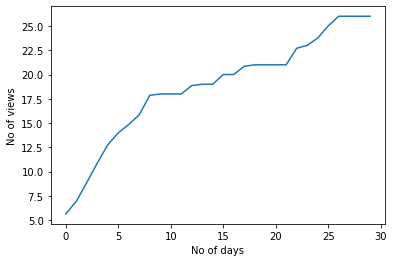

In [ ]:
#plot one random image popularity
img_views=popularity.values
img_views=img_views[:,1:]
x=random.randint(0,20336)
print(str(x+1)+"th image")
plt.plot(img_views[x,1:])
plt.xlabel("No of days")
plt.ylabel("No of views")
plt.show()

In [ ]:
img_views[:,0]

array([2.36475737e+10, 2.36475821e+10, 2.36475824e+10, ...,
       4.91089332e+10, 4.91089335e+10, 4.91089349e+10])

In [ ]:
img_views.shape

(20337, 31)

In [ ]:
#Normalising the shape of each image

n_views=img_views
for i in range(n_views.shape[0]):
  final_views=n_views[i,30]
  for j in range(1,n_views.shape[1]):
    n_views[i,j]/=final_views
  

In [ ]:
n_views.shape

(20337, 31)

711th image


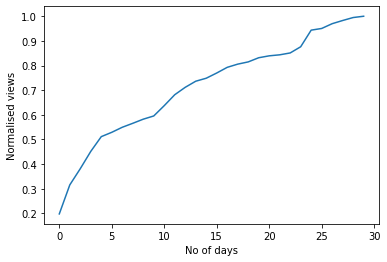

In [ ]:
#plotting one random image after normalisation
# x=random.randint(0,20336)
print(str(x+1)+"th image")
plt.plot(n_views[x,1:])
plt.xlabel("No of days")
plt.ylabel("Normalised views")
plt.show()

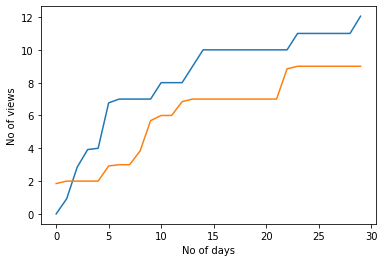

In [ ]:
plt.plot(img_views[3,1:])
plt.plot(img_views[1,1:])
plt.xlabel("No of days")
plt.ylabel("No of views")
plt.show()

In [ ]:
import math 

In [ ]:
img1=[]
for i in range(30):
  img1.append(math.log((img_views[1,1+i]/i+1)+1,2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
img1=np.asarray(img1)

In [ ]:
img1

array([       inf, 2.        , 1.5849625 , 1.4150375 , 1.32192809,
       1.36982011, 1.32192809, 1.28010792, 1.31057077, 1.39608718,
       1.37851162, 1.3479233 , 1.36191641, 1.3439544 , 1.32192809,
       1.30256277, 1.28540222, 1.27008916, 1.25633975, 1.24392558,
       1.23266076, 1.22239242, 1.26421408, 1.25779776, 1.24792751,
       1.23878686, 1.23029762, 1.22239242, 1.21501289, 1.2081082 ])

In [ ]:
img2=[]
for i in range(30):
  img2.append(math.log((img_views[3,1+i]/i+1)+1,2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
img2=np.asarray(img2)

Text(0, 0.5, 'Popularity Score')

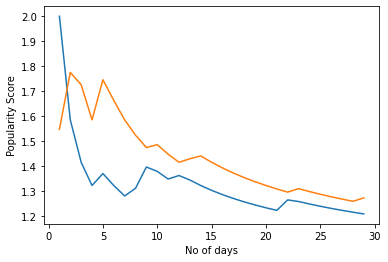

In [ ]:
plt.plot(img1)
plt.plot(img2)
plt.xlabel("No of days")
plt.ylabel("Popularity Score")

In [ ]:
n_views.shape[1]

31

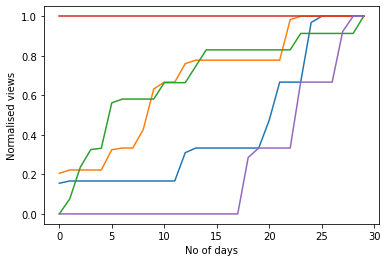

In [ ]:
plt.plot(n_views[69,1:])
plt.plot(n_views[1,1:])
plt.plot(n_views[3,1:])
plt.plot(n_views[20334,1:])
plt.plot(n_views[45,1:])
plt.xlabel("No of days")
plt.ylabel("Normalised views")
plt.show()

In [ ]:
DataVisual=pd.DataFrame(n_views[:,1:])

In [ ]:
DataVisual

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.254845,0.379720,0.439812,0.444444,0.546379,0.555556,0.611111,0.712006,0.777778,0.777778,0.833333,0.833333,0.833333,0.878295,0.888889,0.888889,0.944444,0.944444,0.944444,0.944444,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1,0.205575,0.222222,0.222222,0.222222,0.222222,0.324657,0.333333,0.333333,0.427019,0.631868,0.666667,0.666667,0.760352,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.982577,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.084262,0.258742,0.356584,0.363636,0.447550,0.622368,0.636364,0.636364,0.636364,0.636364,0.636364,0.713250,0.727273,0.818182,0.818182,0.818182,0.818182,0.895079,0.909091,0.909091,0.909091,0.909091,0.909091,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
3,0.000000,0.076575,0.236046,0.325571,0.332003,0.561716,0.581004,0.581004,0.581004,0.581004,0.664005,0.664005,0.664005,0.747006,0.830006,0.830006,0.830006,0.830006,0.830006,0.830006,0.830006,0.830006,0.830006,0.913007,0.913007,0.913007,0.913007,0.913007,0.913007,1.0
4,0.664473,0.793590,0.839581,0.865750,0.882953,0.884298,0.892562,0.900826,0.900826,0.900826,0.909091,0.909091,0.909091,0.925620,0.932508,0.966942,0.966942,0.966942,0.966942,0.966942,0.966942,0.975207,0.991736,0.991736,0.991736,0.991736,0.991736,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20332,0.032014,0.158158,0.260986,0.387604,0.451182,0.475482,0.505200,0.551690,0.599497,0.627962,0.643988,0.688490,0.703357,0.752752,0.772658,0.781913,0.802376,0.861811,0.876670,0.876670,0.876670,0.891529,0.896167,0.906388,0.906388,0.941948,0.984003,0.995540,0.995540,1.0
20333,0.208233,0.333333,0.333333,0.333333,0.354003,0.666667,0.666667,0.666667,0.666667,0.722222,0.722222,0.852436,0.908055,0.963284,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
20334,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
20335,0.000000,0.000000,0.000000,0.364121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
DataVisual.to_excel('DataVisual.xlsx',index=False)

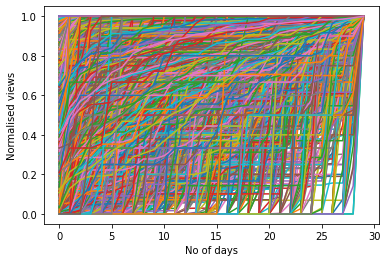

In [ ]:
for i in range(n_views.shape[0]):
  plt.plot(n_views[i,1:])

plt.xlabel("No of days")
plt.ylabel("Normalised views")
plt.show()

In [ ]:
# print(n_views)

In [ ]:
data

array([[0.30723397, 0.33333333, 0.33333333, ..., 1.        , 1.        ,
        1.        ],
       [0.66666667, 0.66666667, 0.66666667, ..., 0.66666667, 1.        ,
        1.        ],
       [0.55555556, 0.55555556, 0.55555556, ..., 0.88888889, 1.        ,
        1.        ],
       ...,
       [0.39443393, 0.61538462, 0.61538462, ..., 1.        , 1.        ,
        1.        ],
       [0.11881633, 0.1897922 , 0.27190918, ..., 0.96918265, 0.98353971,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
#AREA UNDER EACH GRAPH
from scipy.integrate import simps

In [ ]:
area_curve=np.empty((n_views.shape[0],3))

In [ ]:
area_curve.shape

(20337, 3)

In [ ]:
for i in range(n_views.shape[0]):
  area_curve[i,0]=n_views[i,0]
  area_curve[i,1]=simps(n_views[i,1:], dx=1)
  sum=0
  for j in range(30):
    sum+=n_views[i,1+j]
  area_curve[i,2]=sum

In [ ]:
area_curve

array([[2.36475737e+10, 2.38162629e+01, 2.44332790e+01],
       [2.36475821e+10, 1.96195369e+01, 2.02209372e+01],
       [2.36475824e+10, 2.19411538e+01, 2.24687451e+01],
       ...,
       [4.91089332e+10, 2.90000000e+01, 3.00000000e+01],
       [4.91089335e+10, 2.58641209e+01, 2.63641209e+01],
       [4.91089349e+10, 2.49049890e+01, 2.55829789e+01]])

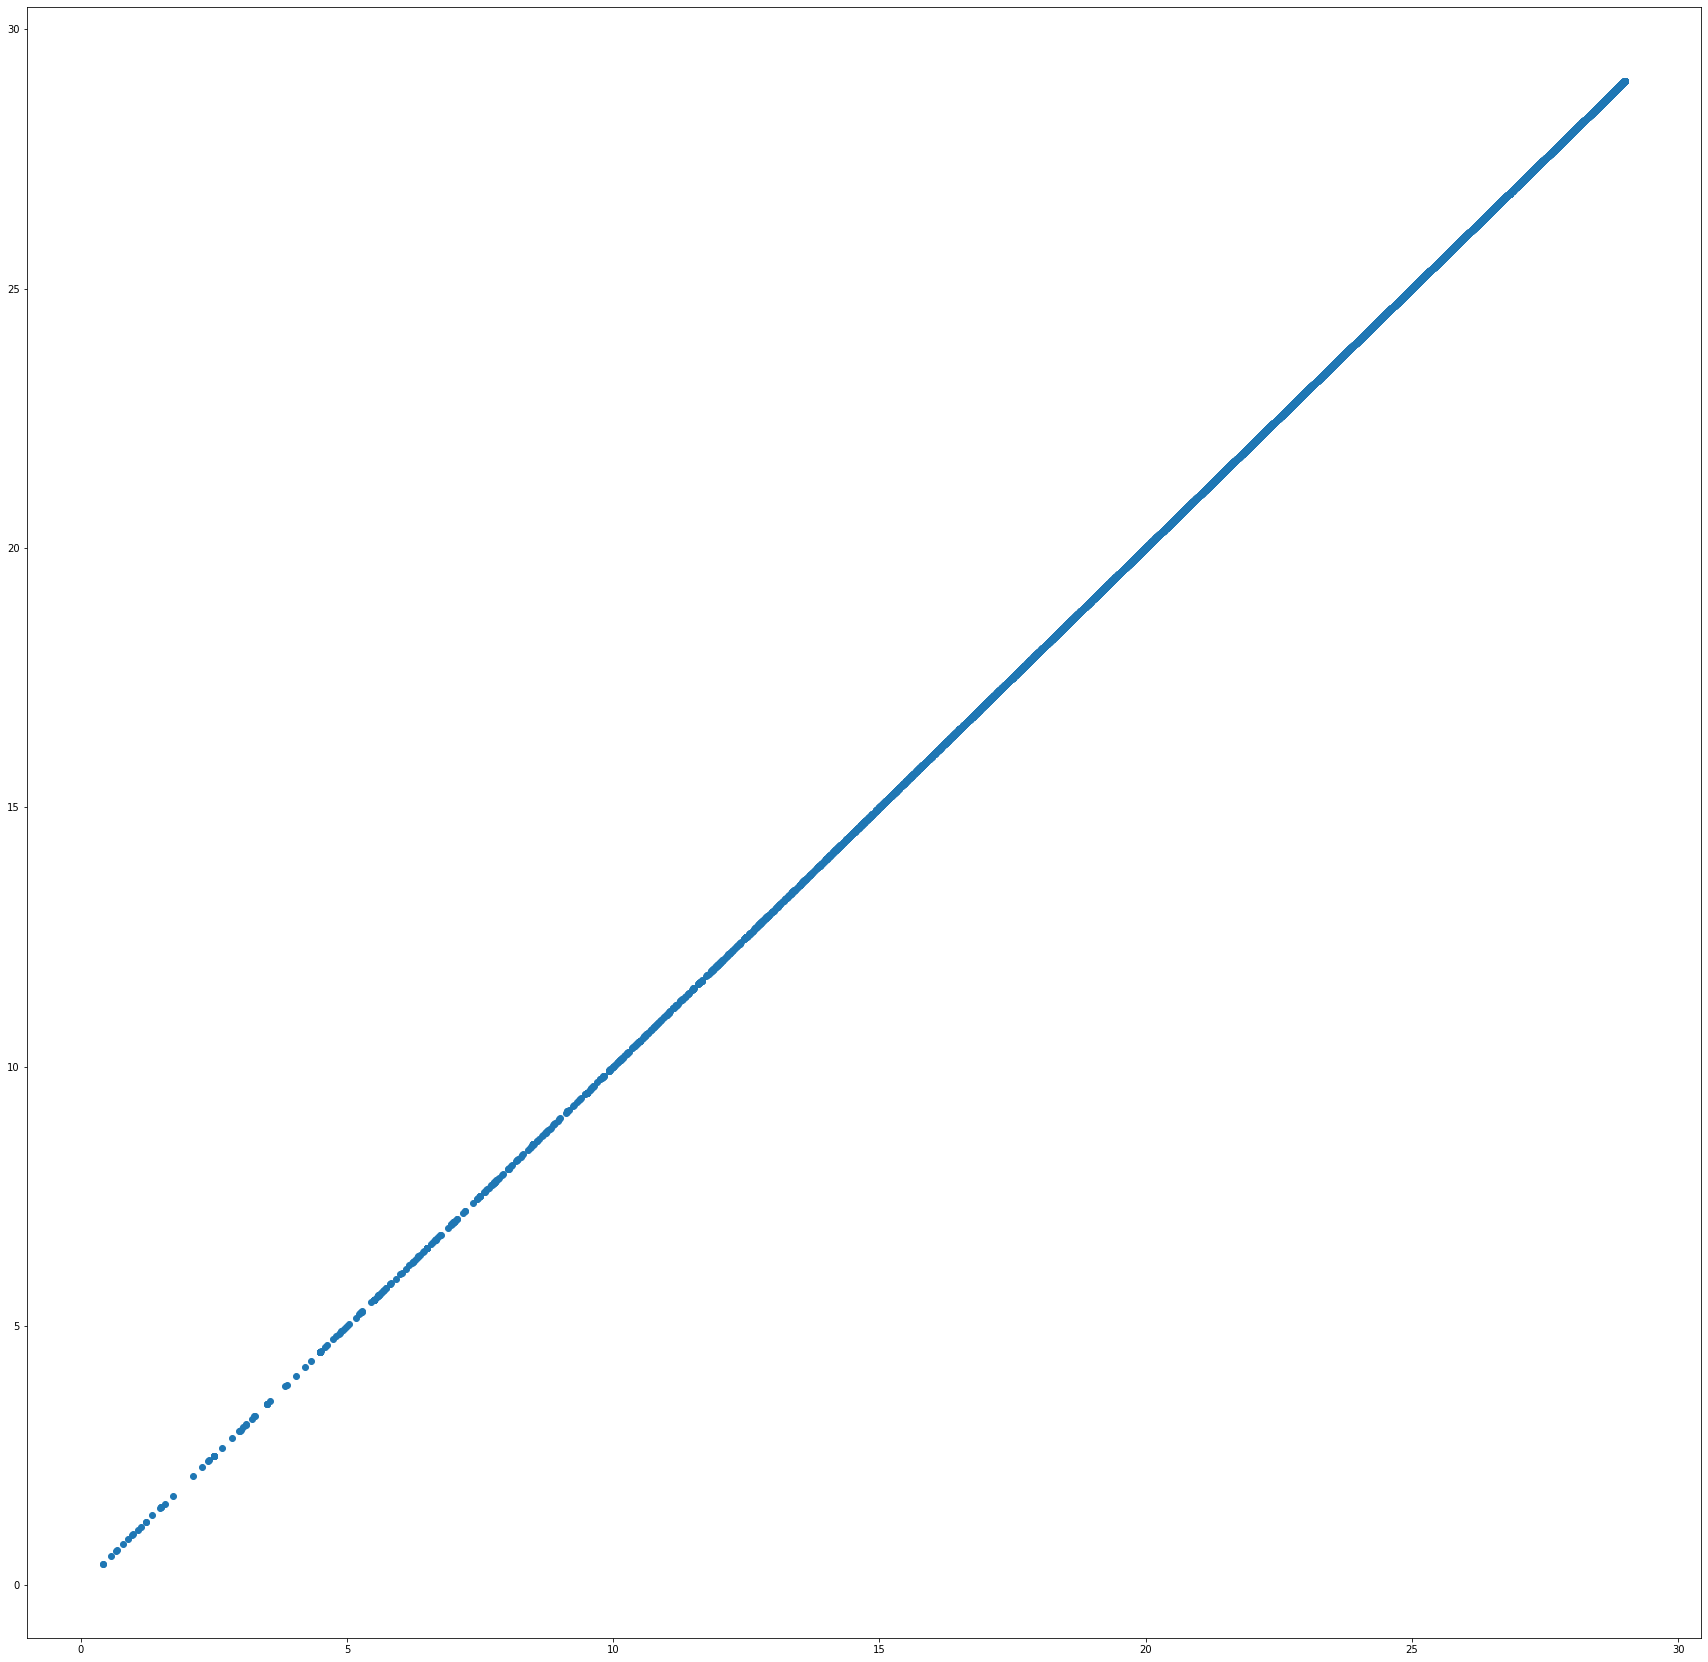

In [ ]:
# Plot the data
plt.figure(figsize=(30, 30))
plt.scatter(area_curve[:, 1], area_curve[:, 1])
# plt.xlabel('Sum of views')
# plt.ylabel('Area under the graph')

In [ ]:
#importing for K-Means Clustering after Normalisation
from sklearn.cluster import KMeans

In [ ]:
#PREPARING DATA FOR CLUSTERING
clustering = pd.DataFrame(data=n_views)
data=n_views[:,1:]
# print(data[1,:])

In [ ]:
clustering.info

In [ ]:
#K-MEANS ALGORTIHM

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
iters=10
clusters=50

In [ ]:
sse=[]
# sil = []
for i in range (iters):
  # np.random.shuffle(data)
  km=KMeans(n_clusters=clusters,max_iter=100,n_init=20,init='k-means++',tol=1e-04)
  clustering[31+i]=km.fit_predict(data)
  # labels = km.labels_
  sse.append(km.inertia_)
  # sil.append(silhouette_score(data,labels,metric = 'manhattan'))
  if(i==0):
    centroids=km.cluster_centers_
  else:
    centroids=np.vstack((centroids,km.cluster_centers_))

In [ ]:
sse=np.asarray(sse)

In [ ]:
print(sse)

In [ ]:
sse.shape

(10,)

In [ ]:
min_val=np.amin(sse.ravel())

In [ ]:
pos=np.where(sse == np.amin(sse))

In [ ]:
pos=min(pos[0])

In [ ]:
pos

6

In [ ]:
#USING THE WSS ERROR METHOD (ELBOW METHOD)
#NAIVE APPROACH

Text(0, 0.5, 'WSS')

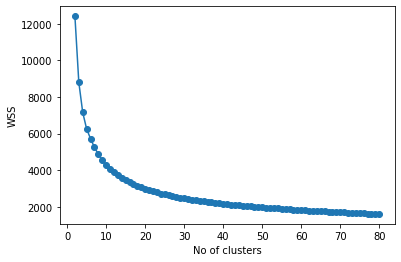

In [ ]:
plt.plot(range(2, clusters+1), sse, marker='o')
plt.xlabel("No of clusters")
plt.ylabel("WSS")

Text(0, 0.5, 'WSS')

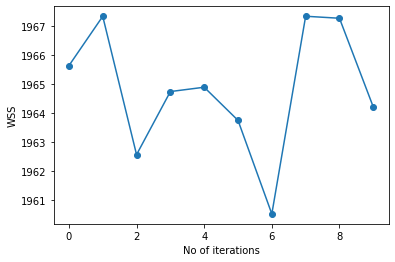

In [ ]:
#FOR 50 CLUSTERS
plt.plot(range(iters), sse, marker='o')
plt.xlabel("No of iterations")
plt.ylabel("WSS")

In [ ]:
#SINCE IT'S NOT VERY CLEAR. WE USE THE SILHOUETTE SCORE METHOD

In [ ]:
sil=np.asarray(sil)

In [ ]:
sil.shape

(79,)

In [ ]:
max_val=np.amax(sil.ravel())

In [ ]:
pos_max=np.where(sil == max_val)

In [ ]:
min_val=np.amin(sil.ravel())

In [ ]:
pos_min=np.where(sil == min_val)

In [ ]:
pos_max

(array([0]),)

In [ ]:
max_val

0.43798677135552744

In [ ]:
min_val

0.21032541015171022

In [ ]:
pos_min

(array([143]),)

Text(0, 0.5, 'Silhouette score')

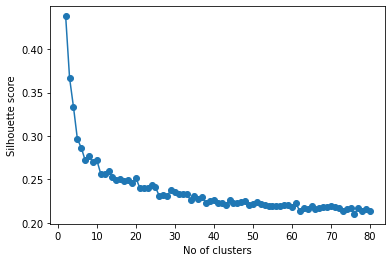

In [ ]:
#Euclidean distance
plt.plot(range(2, clusters+1), sil, marker='o')
plt.xlabel("No of clusters")
plt.ylabel("Silhouette score")

Text(0, 0.5, 'Silhouette score')

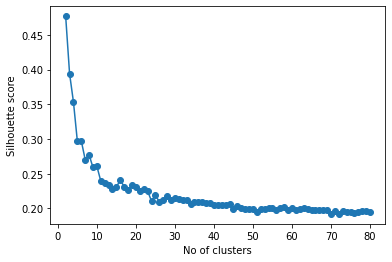

In [ ]:
#Manhattan distance
plt.plot(range(2, clusters+1), sil, marker='o')
plt.xlabel("No of clusters")
plt.ylabel("Silhouette score")

In [ ]:
#GAP STASTISTIC METHOD

In [ ]:
# def Wk(mu, clusters):
#     K = len(mu)
#     return sum([np.linalg.norm(mu[i]-c)**2/(2*len(c)) 
#                for i in range(K) for c in clusters[i]])

In [ ]:
# def bounding_box(X):
#     xmin, xmax = min(X,key=lambda a:a[0])[0], max(X,key=lambda a:a[0])[0]
#     ymin, ymax = min(X,key=lambda a:a[1])[1], max(X,key=lambda a:a[1])[1]
#     return (xmin,xmax), (ymin,ymax)

In [ ]:
# def gap_statistic(X):
#     (xmin,xmax), (ymin,ymax) = bounding_box(X)
#     # Dispersion for real distribution
#     ks = range(1,10)
#     Wks = zeros(len(ks))
#     Wkbs = zeros(len(ks))
#     sk = zeros(len(ks))
#     for indk, k in enumerate(ks):
#         mu, clusters = find_centers(X,k)
#         Wks[indk] = np.log(Wk(mu, clusters))
#         # Create B reference datasets
#         B = 10
#         BWkbs = zeros(B)
#         for i in range(B):
#             Xb = []
#             for n in range(len(X)):
#                 Xb.append([random.uniform(xmin,xmax),
#                           random.uniform(ymin,ymax)])
#             Xb = np.array(Xb)
#             mu, clusters = find_centers(Xb,k)
#             BWkbs[i] = np.log(Wk(mu, clusters))
#         Wkbs[indk] = sum(BWkbs)/B
#         sk[indk] = np.sqrt(sum((BWkbs-Wkbs[indk])**2)/B)
#     sk = sk*np.sqrt(1+1/B)
#     return(ks, Wks, Wkbs, sk)

In [ ]:
# ks, logWks, logWkbs, sk = gap_statistic(X)

In [ ]:
#OPTIMAL CLUSTER CENTRES
optimal=centroids[clusters*pos:clusters*(pos+1),:]

In [ ]:
optimal.shape

(50, 30)

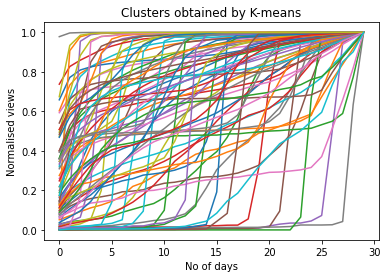

In [ ]:
#plotting the centroids
for i in range (optimal.shape[0]):
  plt.plot(optimal[i,:])
plt.title('Clusters obtained by K-means')
plt.xlabel('No of days')
plt.ylabel('Normalised views')
plt.show()

In [ ]:
#AGGLOMERATIVE HEIRARCHIAL CLUSTERING

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
import sys
sys.setrecursionlimit(10000)

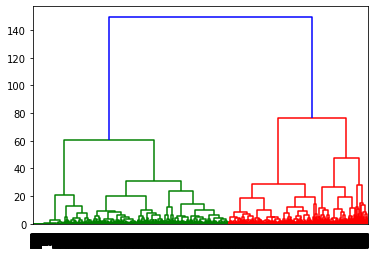

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))

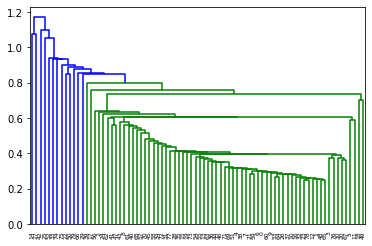

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(optimal, method='single'))

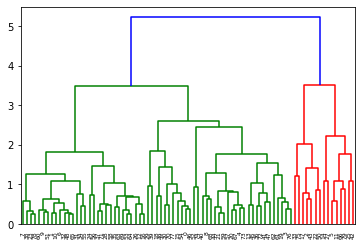

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(optimal, method='complete'))

In [ ]:
model = AgglomerativeClustering(n_clusters=50, affinity='euclidean', linkage='ward')
clustering[31]=model.fit_predict(data)
labels = model.labels_

In [ ]:
labels.shape

(20337,)

In [ ]:
# #Dropping the columns that do not represent proper clusters

# for i in range(iters):
#   if(i!=pos):
#     clustering.drop([31+i],axis=1,inplace=True)

In [ ]:
# clustering.drop([31+pos],axis=1,inplace=True)

In [ ]:
#MEAN SHIFT CLUSTERING

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
ms = MeanShift(bandwidth=0.54,max_iter=1000)
clustering[31]=ms.fit_predict(data)
cluster_centers = ms.cluster_centers_ 

In [ ]:
cluster_centers.shape

(66, 30)

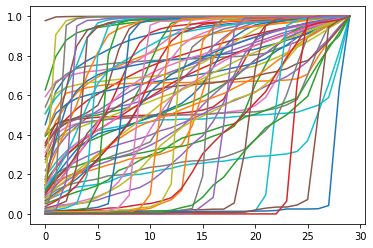

In [ ]:
#plotting the centroids
for i in range (cluster_centers.shape[0]):
  plt.plot(cluster_centers[i,:])

plt.show()

In [ ]:
ms.labels_

array([53,  5, 44,  8,  3, 66, 14, 47,  4, 24, 30,  0, 39, 11, 21, 65, 43,
        3,  6, 27, 49, 56, 61, 26, 10,  0, 55, 62, 32, 25, 19,  0, 12, 48,
       60, 16, 59,  0,  3, 17, 34,  1,  9,  3, 37, 64, 40, 50,  1, 58, 28,
       22,  2,  2, 67, 38, 23,  0,  2, 52, 36,  7, 20,  1, 15, 13, 18, 63,
       35, 57, 29, 42, 45,  0, 46, 41, 31, 51, 33, 54])

In [ ]:
#KMEANS AGAIN

In [ ]:
# iters1=10
clusters1=cluster_centers.shape[0] #68

In [ ]:

for i in range (1):
  # np.random.shuffle(data)
  km1=KMeans(n_clusters=clusters1,max_iter=200,init=cluster_centers,tol=1e-04)
  clustering[31+i]=km1.fit_predict(data)
  sse1=km1.inertia_
  if(i==0):
    centroids1=km1.cluster_centers_
  else:
    centroids1=np.vstack((centroids1,km1.cluster_centers_))

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


In [ ]:
sse1=np.asarray(sse1)

In [ ]:
sse1.shape

()

In [ ]:
min_val1=np.amin(sse1.ravel())
pos1=np.where(sse1 == np.amin(sse1))
pos1=min(pos1[0])

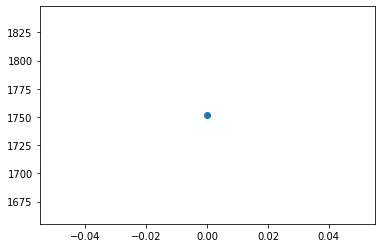

In [ ]:
plt.plot(range(0,1), sse1, marker='o')

In [ ]:
centroids1.shape

(66, 30)

In [ ]:
#OPTIMAL CLUSTER CENTRES
optimal1=centroids1

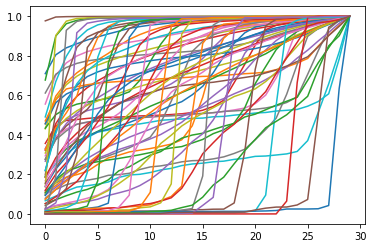

In [ ]:
#plotting the centroids
for i in range (optimal1.shape[0]):
  plt.plot(optimal1[i,:])

plt.show()

In [ ]:
#Dropping the columns that do not represent proper clusters

for i in range(iters):
  if(i!=pos):
    clustering.drop([31+i],axis=1,inplace=True)

In [ ]:
clustering

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,37
0,2.364757e+10,0.254845,0.379720,0.439812,0.444444,0.546379,0.555556,0.611111,0.712006,0.777778,0.777778,0.833333,0.833333,0.833333,0.878295,0.888889,0.888889,0.944444,0.944444,0.944444,0.944444,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,35
1,2.364758e+10,0.205575,0.222222,0.222222,0.222222,0.222222,0.324657,0.333333,0.333333,0.427019,0.631868,0.666667,0.666667,0.760352,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.982577,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,48
2,2.364758e+10,0.084262,0.258742,0.356584,0.363636,0.447550,0.622368,0.636364,0.636364,0.636364,0.636364,0.636364,0.713250,0.727273,0.818182,0.818182,0.818182,0.818182,0.895079,0.909091,0.909091,0.909091,0.909091,0.909091,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0
3,2.364758e+10,0.000000,0.076575,0.236046,0.325571,0.332003,0.561716,0.581004,0.581004,0.581004,0.581004,0.664005,0.664005,0.664005,0.747006,0.830006,0.830006,0.830006,0.830006,0.830006,0.830006,0.830006,0.830006,0.830006,0.913007,0.913007,0.913007,0.913007,0.913007,0.913007,1.0,0
4,2.364759e+10,0.664473,0.793590,0.839581,0.865750,0.882953,0.884298,0.892562,0.900826,0.900826,0.900826,0.909091,0.909091,0.909091,0.925620,0.932508,0.966942,0.966942,0.966942,0.966942,0.966942,0.966942,0.975207,0.991736,0.991736,0.991736,0.991736,0.991736,1.000000,1.000000,1.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20332,4.910893e+10,0.032014,0.158158,0.260986,0.387604,0.451182,0.475482,0.505200,0.551690,0.599497,0.627962,0.643988,0.688490,0.703357,0.752752,0.772658,0.781913,0.802376,0.861811,0.876670,0.876670,0.876670,0.891529,0.896167,0.906388,0.906388,0.941948,0.984003,0.995540,0.995540,1.0,0
20333,4.910893e+10,0.208233,0.333333,0.333333,0.333333,0.354003,0.666667,0.666667,0.666667,0.666667,0.722222,0.722222,0.852436,0.908055,0.963284,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,5
20334,4.910893e+10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,4
20335,4.910893e+10,0.000000,0.000000,0.000000,0.364121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,37


In [ ]:
#DBSCAN

In [ ]:
# from sklearn.cluster import DBSCAN

In [ ]:
# dbscan = DBSCAN(eps=0.41, min_samples = 2)
# clustering[31] = dbscan.fit_predict(data)
# optimal=dbscan.cluster_centers_ 

In [ ]:
# clustering[clustering[31]==0]

In [ ]:
# plt.plot(n_views[20332,1:])

In [ ]:
# clustering[31].value_counts()

In [ ]:
# clustering[31].unique()

In [ ]:
# init_centr=np.empty((clusters,30))

In [ ]:
# init_centr.shape

(50, 30)

In [ ]:
# #Averaging the centroids over iterations
# for i in range (centroids.shape[1]):
#   for l in range (clusters):
#     sum_col=0
#     for j in range (iters):
#       sum_col+=centroids[(j*clusters)+l,i]
#     init_centr[l,i]=sum_col/iters 


In [ ]:
#INITIAL CLUSTER CENTRES
# init_centr

In [ ]:
# optimal_centr=np.empty((clusters,30))

In [ ]:
# data1=n_views[:,1:]

In [ ]:
# #Starting clustering again
# sse1=[]
# km1=KMeans(n_clusters=clusters,max_iter=100,n_init=1,init=init_centr,tol=1e-06)
# clustering[31]=km1.fit_predict(data1)
# sse1.append(km1.inertia_)
# optimal_centr=km1.cluster_centers_

In [ ]:
# sse1

[2079.9197709792084]

In [ ]:
centroids.shape

(50, 30)

In [ ]:
#OPTIMAL CLUSTER CENTRES
# optimal=centroids[clusters*pos:clusters*(pos+1),:]
# optimal=centroids
# optimal=cluster_centers

In [ ]:
optimal.shape

(49, 30)

In [ ]:
shapes=pd.DataFrame(optimal1)

In [ ]:
shapes

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,7.095900e-01,8.049266e-01,8.401451e-01,8.607173e-01,8.800080e-01,8.954631e-01,0.910579,9.242999e-01,9.389890e-01,9.475592e-01,9.552201e-01,9.606549e-01,9.664379e-01,0.970099,9.735712e-01,0.976212,9.789511e-01,9.811323e-01,9.832567e-01,9.852994e-01,0.986789,9.882305e-01,9.901359e-01,0.991540,0.992962,0.994373,0.995904,0.997329,0.998363,1.0
1,4.568279e-01,5.960315e-01,6.656636e-01,7.132026e-01,7.519581e-01,7.793486e-01,0.812087,8.499765e-01,8.827560e-01,9.069603e-01,9.269443e-01,9.433133e-01,9.562558e-01,0.964162,9.703172e-01,0.975200,9.789782e-01,9.826567e-01,9.847860e-01,9.868423e-01,0.988572,9.907982e-01,9.927419e-01,0.993849,0.995021,0.996123,0.997026,0.997980,0.998885,1.0
2,6.772063e-01,8.999069e-01,9.620640e-01,9.791664e-01,9.888481e-01,9.926532e-01,0.994353,9.953071e-01,9.963493e-01,9.967464e-01,9.970061e-01,9.972318e-01,9.976561e-01,0.998031,9.982282e-01,0.998415,9.987179e-01,9.988428e-01,9.989699e-01,9.990401e-01,0.999177,9.992286e-01,9.992834e-01,0.999411,0.999523,0.999637,0.999733,0.999851,0.999924,1.0
3,3.217937e-01,4.567783e-01,5.361209e-01,5.942675e-01,6.389306e-01,6.736430e-01,0.703288,7.328896e-01,7.604509e-01,7.834862e-01,8.031317e-01,8.219488e-01,8.374130e-01,0.852807,8.669949e-01,0.880566,8.936105e-01,9.058877e-01,9.171321e-01,9.271505e-01,0.936390,9.457662e-01,9.544673e-01,0.961958,0.969001,0.975154,0.980979,0.987580,0.994224,1.0
4,2.667139e-01,3.839996e-01,4.564115e-01,5.091814e-01,5.532734e-01,5.878513e-01,0.619800,6.529737e-01,6.823282e-01,7.113591e-01,7.347665e-01,7.561668e-01,7.769407e-01,0.796194,8.129833e-01,0.829435,8.451618e-01,8.602266e-01,8.737565e-01,8.852092e-01,0.899774,9.123005e-01,9.250668e-01,0.938264,0.949784,0.961060,0.971340,0.981081,0.990710,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,3.824856e-03,4.101648e-03,5.584633e-03,6.115369e-03,7.377651e-03,1.133176e-02,0.011871,1.447472e-02,1.447472e-02,3.270081e-02,1.091223e-01,5.469784e-01,9.488513e-01,0.986703,9.880029e-01,0.988307,9.932112e-01,9.942327e-01,9.953125e-01,9.953125e-01,0.998438,9.984375e-01,9.984375e-01,0.999449,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
62,5.810133e-04,4.227532e-03,4.227532e-03,4.227532e-03,4.237376e-03,4.528614e-03,0.004529,5.081892e-03,5.639725e-03,7.011728e-03,1.217712e-02,1.407984e-02,1.846505e-02,0.032001,4.417531e-02,0.084790,1.457286e-01,1.858130e-01,2.540007e-01,3.198370e-01,0.376479,4.358437e-01,4.682409e-01,0.501540,0.548838,0.595021,0.732435,0.850069,0.900990,1.0
63,2.220446e-16,-1.665335e-16,5.551115e-16,3.330669e-16,3.330669e-16,4.440892e-16,0.000000,-2.220446e-16,2.220446e-16,-3.330669e-16,-3.330669e-16,-5.551115e-16,9.992007e-16,0.000000,2.220446e-16,0.000000,-2.220446e-16,-6.661338e-16,-5.551115e-16,-3.330669e-16,0.000000,-9.992007e-16,5.551115e-16,0.064993,0.663991,0.993646,1.000000,1.000000,1.000000,1.0
64,1.665335e-16,1.110223e-16,2.820646e-04,1.543210e-03,1.543210e-03,1.543210e-03,0.001543,1.543210e-03,1.543210e-03,1.543210e-03,1.543210e-03,1.543210e-03,2.315482e-03,0.002561,3.891573e-03,0.043108,8.377456e-02,4.532314e-01,9.307532e-01,9.924022e-01,0.992552,9.927425e-01,9.946438e-01,0.996041,0.996041,0.996041,0.996041,0.998332,0.998457,1.0


In [ ]:
shapes.to_csv(path_data+'Optimal.csv',index=False)

In [ ]:
clustering

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,36
0,2.364757e+10,0.685705,0.785714,0.994687,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,43
1,2.364758e+10,0.333333,0.365442,0.595167,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,7
2,2.364758e+10,0.500000,0.666605,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,12
3,2.364758e+10,0.666667,0.746796,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0
4,2.364759e+10,0.181818,0.181818,0.181818,0.209955,0.272727,0.272727,0.545455,0.545455,0.599033,0.690030,0.727273,0.727273,0.727273,0.727273,0.727273,0.727273,0.727273,0.727273,0.727273,0.727273,0.727273,0.727273,0.727273,0.727273,0.727273,0.857250,1.000000,1.000000,1.000000,1.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20332,4.910893e+10,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.958734,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0
20333,4.910893e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.666667,0.666667,0.666667,0.887524,1.000000,1.000000,1.0,3
20334,4.910893e+10,0.064143,0.231206,0.282171,0.390650,0.420000,0.420000,0.440509,0.509773,0.539362,0.579354,0.637193,0.680000,0.690078,0.730000,0.788353,0.840000,0.840000,0.849784,0.860000,0.860000,0.880000,0.940000,0.949698,0.960000,0.960000,0.968911,0.990250,1.000000,1.000000,1.0,1
20335,4.910893e+10,0.426354,0.723072,0.796002,0.879768,0.912306,0.914286,0.914286,0.942857,0.942857,0.942857,0.942857,0.967419,0.971429,0.971429,0.971429,0.971429,0.971429,0.971429,0.971429,0.971429,0.971429,0.971429,0.971429,0.971429,0.971429,0.971429,0.971429,0.971429,0.971429,1.0,4


In [ ]:
#OBTAINED THE CLUSTER PROTOTYPES
clustering[clustering[31+pos]==2]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,37
69,2.364788e+10,0.155161,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.309737,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.473786,0.666667,0.666667,0.666667,0.968387,1.000000,1.000000,1.000000,1.0,1.0,2
91,2.364800e+10,0.187825,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.374932,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,2
252,2.365022e+10,0.002494,0.050000,0.050000,0.050000,0.052421,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.104439,0.150000,0.180845,0.650000,0.650000,0.700000,0.700000,0.700000,0.800000,0.800000,0.900065,1.000000,1.000000,1.0,1.0,2
472,2.365238e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,2
595,2.365381e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.500000,0.500000,0.500000,0.500000,0.500000,0.750000,0.750000,0.750000,0.788659,1.000000,1.000000,1.000000,1.000000,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19510,4.910792e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,0.992417,1.000000,1.000000,1.000000,1.0,1.0,2
19515,4.910793e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020687,0.120061,0.317618,0.400000,0.400000,0.400000,0.400000,0.500000,0.534668,0.700000,0.700000,0.717856,0.800000,0.805238,0.875989,0.933783,1.0,1.0,2
19759,4.910812e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.634824,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,2
19914,4.910824e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.171184,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.549493,0.903275,1.000000,1.0,1.0,2


In [ ]:
#CLUSTERED IMAGES BASED ON SHAPE
# clustering.head()

In [ ]:
# clustering[31+pos].value_counts()

In [ ]:
clustering[31].value_counts()

43    1829
2     1311
1     1288
28    1274
13    1127
8      951
40     886
35     881
33     783
0      668
26     592
7      563
15     554
5      522
14     518
49     512
25     509
18     481
30     473
27     386
3      371
6      363
19     360
11     352
9      212
41     211
48     184
39     172
23     170
34     157
37     137
36     134
24     133
17     123
22     121
29     117
12     107
16     101
46     100
31      81
47      71
44      64
21      63
20      56
10      55
4       52
32      45
42      44
45      38
38      35
Name: 31, dtype: int64

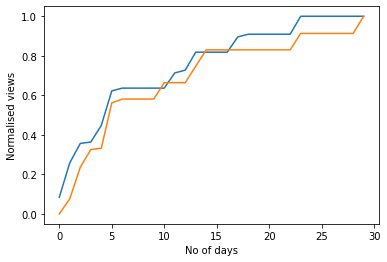

In [ ]:
plt.plot(n_views[2,1:])
plt.plot(n_views[3,1:])
# plt.plot(n_views[37,1:])
plt.xlabel('No of days')
plt.ylabel('Normalised views')
# plt.title("Images belonging to cluster 0 (Kmeans)")
plt.show()

In [ ]:
sum1=0
sum2=0
for i in range(30):
  sum1+=n_views[2,1+i]
  sum2+=n_views[3,1+i]

In [ ]:
print(sum1)
print(sum2)

22.46874505064411
20.543047551949947


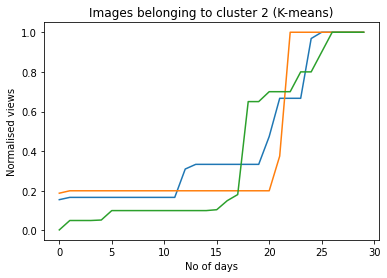

In [ ]:
plt.plot(n_views[69,1:])
plt.plot(n_views[91,1:])
plt.plot(n_views[252,1:])
plt.xlabel('No of days')
plt.ylabel('Normalised views')
plt.title("Images belonging to cluster 2 (K-means)")
plt.show()

In [ ]:
#RENAMING A COLUMN
clustering.rename({0:"FlickrId"},axis=1,inplace=True)

In [ ]:
#DROPPING TEXT FEATURES
img_info.drop(['Title'],axis=1,inplace=True)
img_info.drop(['Description'],axis=1,inplace=True)
img_info.drop(['Tags'],axis=1,inplace=True)

In [ ]:
#ARRANGING THE IMAGES BASED ON FLICKRD
img_info.sort_values(by=['FlickrId'],inplace=True)

In [ ]:
img_info.head()

,FlickrId,Size,NumSets,NumGroups,AvgGroupsMemb,AvgGroupPhotos
621,23647573678,0,1,0,0.0,0.0
164,23647582078,0,1,0,0.0,0.0
57,23647582388,1166400,0,0,0.0,0.0
112,23647583748,0,1,0,0.0,0.0
544,23647586378,2457600,1,0,0.0,0.0


In [ ]:
#MERGING THE CLUSTER NUMBERS TO THIS DATAFRAME
DataPand=pd.merge(img_info,clustering,on="FlickrId")

In [ ]:
DataPand.isnull().sum()

In [ ]:
DataPand.describe

<bound method NDFrame.describe of           FlickrId      Size  NumSets  NumGroups  ...        28        29   30  38
0      23647573678         0        1          0  ...  1.000000  1.000000  1.0  19
1      23647582078         0        1          0  ...  1.000000  1.000000  1.0  43
2      23647582388   1166400        0          0  ...  1.000000  1.000000  1.0  72
3      23647583748         0        1          0  ...  0.991828  0.995701  1.0   1
4      23647586378   2457600        1          0  ...  1.000000  1.000000  1.0  60
...            ...       ...      ...        ...  ...       ...       ...  ...  ..
20332  49108928407    288300        0          0  ...  1.000000  1.000000  1.0  26
20333  49108930512  24160256        1          0  ...  1.000000  1.000000  1.0  12
20334  49108933202  17735042        0          0  ...  1.000000  1.000000  1.0  28
20335  49108933542    202500        0          0  ...  0.968421  0.968421  1.0  48
20336  49108934937         0        1         11  ...

In [ ]:
# #Checking for data
print(clustering[clustering['FlickrId']==37469145482])

          FlickrId    1    2         3     4  ...    27   28   29   30  48
4984  3.746915e+10  0.0  0.0  0.233417  0.25  ...  0.75  1.0  1.0  1.0   0

[1 rows x 32 columns]


In [ ]:
#Dropping columns from Datapand
#Drop the columns from 1 to 30
for i in range(1,31):
  DataPand.drop([i],axis=1,inplace=True)

In [ ]:
DataPand

,FlickrId,Size,NumSets,NumGroups,AvgGroupsMemb,AvgGroupPhotos,31
0,23647573678,0,1,0,0.000000,0.000000,49
1,23647582078,0,1,0,0.000000,0.000000,0
2,23647582388,1166400,0,0,0.000000,0.000000,15
3,23647583748,0,1,0,0.000000,0.000000,0
4,23647586378,2457600,1,0,0.000000,0.000000,13
...,...,...,...,...,...,...,...
20332,49108928407,288300,0,0,0.000000,0.000000,0
20333,49108930512,24160256,1,0,0.000000,0.000000,18
20334,49108933202,17735042,0,0,0.000000,0.000000,43
20335,49108933542,202500,0,0,0.000000,0.000000,29


In [ ]:
DataPand.rename({31:"Cluster"},axis=1,inplace=True)

In [ ]:
img_info[img_info['FlickrId']==23647586378]

,FlickrId,Size,NumSets,NumGroups,AvgGroupsMemb,AvgGroupPhotos
544,23647586378,2457600,1,0,0.0,0.0


In [ ]:
clustering[clustering['FlickrId']==23647586378]

,FlickrId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,38
4,2.364759e+10,0.214067,0.30303,0.30303,0.30303,0.30303,0.30303,0.30303,0.30303,0.30303,0.30303,0.30303,0.30303,0.30303,0.30303,0.30303,0.30303,0.30303,0.30303,0.318162,0.363636,0.407764,0.424242,0.498643,0.647766,0.708149,0.787879,0.800082,1.0,1.0,1.0,60


In [ ]:
header_new[header_new['FlickrId']==49108930512]

,FlickrId,UserId
28005,49108930512,182792899@N06


In [ ]:
users_new[users_new['UserId']=='182792899@N06']

,UserId,Ispro,HasStats,Contacts,PhotoCount,MeanViews,GroupsCount,GroupsAvgMembers,GroupsAvgPictures
22842,182792899@N06,0,0,5,595,2.947899,4,237923.0,5421150.5


In [ ]:
headers

,FlickrId,UserId
0,23647573678,32659680@N00
1,23647582078,78682984@N00
2,23647582388,14305351@N00
3,23647583748,54533346@N03
4,23647586378,152637408@N06
...,...,...
20332,49108928407,185140085@N03
20333,49108930512,182792899@N06
20334,49108933202,146269332@N03
20335,49108933542,145542896@N02


In [ ]:
users

,UserId,Ispro,HasStats,Contacts,PhotoCount,MeanViews,GroupsCount,GroupsAvgMembers,GroupsAvgPictures
0,147723055@N04,0,0,0,1700,5.078824,0,0.000000,0.000000e+00
1,61467889@N07,0,0,2,570,13.301754,0,0.000000,0.000000e+00
2,147542604@N05,0,0,33,1603,18.170930,12,790.416667,1.707708e+04
3,37171654@N03,0,0,49,1835,10.023978,56,16525.285714,2.073896e+05
4,146766089@N08,0,0,4,6150,18.680163,0,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...
13586,24206456@N08,1,1,32,1513,102.501652,27,4323.851852,6.823819e+04
13587,169551755@N07,0,0,88,330,955.169697,67,28241.044776,1.110649e+06
13588,63153524@N05,0,0,132,502,275.368526,137,43431.459854,1.492800e+06
13589,67647802@N06,1,1,7,540,38.529630,0,0.000000,0.000000e+00


In [ ]:
#COMBINING THE USER AND HEADER FEATURES
user_header=pd.merge(headers,users,on="UserId")

In [ ]:
user_header

,FlickrId,UserId,Ispro,HasStats,Contacts,PhotoCount,MeanViews,GroupsCount,GroupsAvgMembers,GroupsAvgPictures
0,23647573678,32659680@N00,0,1,148,7006,21.114331,153,17954.915033,3.284815e+05
1,23647582078,78682984@N00,0,0,55,565,65.538053,4,19875.750000,1.215500e+03
2,23647582388,14305351@N00,0,0,5,562,70.215302,0,0.000000,0.000000e+00
3,23647583748,54533346@N03,1,1,3,16203,47.766900,0,0.000000,0.000000e+00
4,23647586378,152637408@N06,0,0,485,397,162.307305,0,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
20332,49108928317,159435508@N06,0,0,15,70,27.028571,0,0.000000,0.000000e+00
20333,49108928407,185140085@N03,0,0,0,116,67.525862,0,0.000000,0.000000e+00
20334,49108930512,182792899@N06,0,0,5,595,2.947899,4,237923.000000,5.421150e+06
20335,49108933542,145542896@N02,0,0,0,245,2.640816,0,0.000000,0.000000e+00


In [ ]:
#ONCE CONFIRMED DROP USERID
user_header.drop(['UserId'],axis=1,inplace=True)

In [ ]:
#SORTING ON BASIS OF FLICKRID
user_header.sort_values(by=['FlickrId'],inplace=True)

In [ ]:
#COMBINING USER SOCIAL FEATURES WITH POST FEATURES
Final_List=pd.merge(user_header,DataPand,on="FlickrId")

In [ ]:
Final_List

,FlickrId,Ispro,HasStats,Contacts,PhotoCount,MeanViews,GroupsCount,GroupsAvgMembers,GroupsAvgPictures,Size,NumSets,NumGroups,AvgGroupsMemb,AvgGroupPhotos,Cluster
0,23647573678,0,1,148,7006,21.114331,153,17954.915033,3.284815e+05,0,1,0,0.000000,0.000000,49
1,23647582078,0,0,55,565,65.538053,4,19875.750000,1.215500e+03,0,1,0,0.000000,0.000000,0
2,23647582388,0,0,5,562,70.215302,0,0.000000,0.000000e+00,1166400,0,0,0.000000,0.000000,15
3,23647583748,1,1,3,16203,47.766900,0,0.000000,0.000000e+00,0,1,0,0.000000,0.000000,0
4,23647586378,0,0,485,397,162.307305,0,0.000000,0.000000e+00,2457600,1,0,0.000000,0.000000,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20332,49108928407,0,0,0,116,67.525862,0,0.000000,0.000000e+00,288300,0,0,0.000000,0.000000,0
20333,49108930512,0,0,5,595,2.947899,4,237923.000000,5.421150e+06,24160256,1,0,0.000000,0.000000,18
20334,49108933202,1,1,0,339486,7.119500,1,1224.000000,3.009500e+04,17735042,0,0,0.000000,0.000000,43
20335,49108933542,0,0,0,245,2.640816,0,0.000000,0.000000e+00,202500,0,0,0.000000,0.000000,29


In [ ]:
Final_List.to_csv(path_data+'Features.csv',index=False)

In [ ]:
#TESTING THINGS

In [ ]:
popularity[popularity.FlickrId==36790025014]

,Unnamed: 0,FlickrId,Day01,Day02,Day03,Day04,Day05,Day06,Day07,Day08,Day09,Day10,Day11,Day12,Day13,Day14,Day15,Day16,Day17,Day18,Day19,Day20,Day21,Day22,Day23,Day24,Day25,Day26,Day27,Day28,Day29,Day30
987,1168,36790025014,34.325778,45.316482,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.847676,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0
